In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Path to your data file
file_path = '2024-09-16_23-42-24_stratus.txt'

# Read and preprocess the data
with open(file_path, 'r') as file:
    raw_data = file.read()

# Clean and extract hexadecimal values
raw_data = raw_data.replace('\n', ' ').replace(' ', '')
hex_data = [x for x in raw_data.split(',') if x.strip().startswith('0x')]
data = [int(x.strip(), 16) for x in hex_data]

# Define image dimensions (ensure this matches your actual image size)
image_width = 128
image_height = 128

# Ensure the data length is correct
if len(data) == image_width * image_height:
    # Convert data to RGB format
    image_data = np.array(data, dtype=np.uint32).reshape((image_height, image_width))

    # Unpack RGB components
    r = (image_data >> 16) & 0xFF
    g = (image_data >> 8) & 0xFF
    b = image_data & 0xFF

    # Combine into an RGB image
    rgb_image = np.stack((r, g, b), axis=-1)

    # Display the image
    plt.imshow(rgb_image)
    plt.title('RGB Image')
    plt.axis('off')
    plt.show()
    
else:
    print(f"Error: Data length {len(data)} does not match the expected size {image_width * image_height}.")


Error: Data length 0 does not match the expected size 16384.


In [13]:
import math
pixel_count = len(data)
dimension = int(math.sqrt(pixel_count))
print(f"Suggested dimensions: {dimension}x{dimension}")


Suggested dimensions: 0x0


Data length: 16384


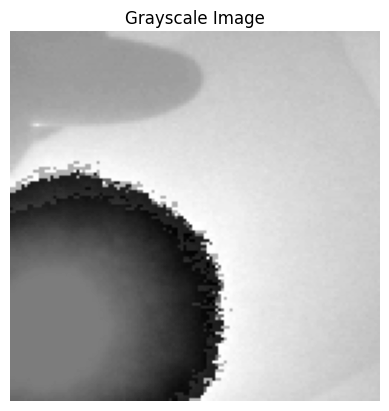

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Path to your data file
file_path = '2024-09-17_00-10-24_nimbostratus.txt'

# Read and preprocess the data from the file
with open(file_path, 'r') as file:
    raw_data = file.read()

# Clean the data: remove newlines, spaces, and ensure values are split correctly
raw_data = raw_data.replace('\n', '').replace(' ', '')  # Remove any newlines and spaces
hex_data = [x.strip() for x in raw_data.split(',')]     # Split by commas

# Convert hex values to integers, skipping any invalid values
try:
    data = [int(x, 16) for x in hex_data]
except ValueError as e:
    print(f"Error in converting hex to int: {e}")

# Determine potential image dimensions
data_length = len(data)
print(f"Data length: {data_length}")

# Use the suggested 128x128 dimensions based on the data length
image_width = 128
image_height = 128

# Ensure the data length matches the expected image size
if len(data) == image_width * image_height:
    # Convert the data to a NumPy array and reshape it
    image_data = np.array(data, dtype=np.uint8).reshape((image_height, image_width))

    # If the data is grayscale (1 value per pixel), plot as a grayscale image
    plt.imshow(image_data, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()
else:
    print(f"Error: Data length {len(data)} does not match the expected size {image_width * image_height}.")


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os

# Path to your data file
file_path = 'cleaned_hex/2024-09-17_00-28-17_nimbostratus.txt'

# Directory to save images
output_dir = 'images'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

with open(file_path, 'r') as file:
    raw_data = file.read()

# Clean the data: remove newlines, spaces, and ensure valid hexadecimal values
raw_data = raw_data.replace('\n', ' ').replace(' ', '')  # Remove newlines and spaces
hex_data = re.findall(r'[0-9A-Fa-f]{2}', raw_data)       # Extract valid 2-digit hex values

try:
    data = [int(x, 16) for x in hex_data]
except ValueError as e:
    print(f"Error in converting hex to int: {e}")

max_data_size = 128 * 128  # 16384 values for a 128x128 image

if len(data) > max_data_size:
    data = data[:max_data_size]  # Keep only the first 16384 values
elif len(data) < max_data_size:
    # Optionally pad with zeros if there are fewer values (comment out if not needed)
    data.extend([0] * (max_data_size - len(data)))

print(f"Data length after adjustment: {len(data)}")

# Convert the data to a NumPy array and reshape it
image_data = np.array(data, dtype=np.uint8).reshape((128, 128))

# Path for the output image
output_file_path = os.path.join(output_dir, 'output_image.jpeg')

# Save the image as a JPEG file
plt.imshow(image_data, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.savefig(output_file_path, format='jpeg', bbox_inches='tight', pad_inches=0)
plt.close()  # Close the plot to free up memory

print(f"Image saved as: {output_file_path}")


Data length after adjustment: 16384
Image saved as: images\output_image.jpeg


In [22]:
import re

def clean_hex_file(filename):
    try:
        with open(filename, 'r') as file:
            raw_data = file.read()

        cleaned_data = re.findall(r'[0-9A-Fa-f]{2}', raw_data)

        cleaned_data_str = ', '.join(cleaned_data)
        
        with open(filename, 'w') as file:
            file.write(cleaned_data_str)

        print(f"Data cleaned in file: {filename}")

    except Exception as e:
        print(f"Error while cleaning file data: {e}")

if __name__ == "__main__":
    file_path = '2024-09-17_00-23-38_nimbostratus.txt'  
    clean_hex_file(file_path)


Data cleaned in file: 2024-09-17_00-23-38_nimbostratus.txt


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os

# Path to your data file
file_path = 'cleaned_hex/2024-09-17_00-29-31_nimbostratus.txt'

# Directory to save images
output_dir = 'images'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Read and process the data from the file
with open(file_path, 'r') as file:
    raw_data = file.read()

# Clean the data: remove newlines, spaces, and ensure valid hexadecimal values
raw_data = raw_data.replace('\n', ' ').replace(' ', '')  # Remove newlines and spaces
hex_data = re.findall(r'[0-9A-Fa-f]{2}', raw_data)       # Extract valid 2-digit hex values

try:
    data = [int(x, 16) for x in hex_data]
except ValueError as e:
    print(f"Error in converting hex to int: {e}")

max_data_size = 128 * 128  # 16384 values for a 128x128 image

if len(data) > max_data_size:
    data = data[:max_data_size]  # Keep only the first 16384 values
elif len(data) < max_data_size:
    # Optionally pad with zeros if there are fewer values (comment out if not needed)
    data.extend([0] * (max_data_size - len(data)))

print(f"Data length after adjustment: {len(data)}")

# Convert the data to a NumPy array and reshape it
image_data = np.array(data, dtype=np.uint8).reshape((128, 128))

# Extract base name of the file without extension
base_name = os.path.splitext(os.path.basename(file_path))[0]

# Path for the output image
output_file_path = os.path.join(output_dir, f'{base_name}.jpeg')

# Save the image as a JPEG file without showing it
plt.imshow(image_data, cmap='gray')
plt.axis('off')  # Hide the axes
plt.savefig(output_file_path, format='jpeg', bbox_inches='tight', pad_inches=0)
plt.close()  # Close the plot to free up memory

print(f"Image saved as: {output_file_path}")


Data length after adjustment: 16384
Image saved as: images\2024-09-17_00-29-31_nimbostratus.jpeg
